In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import seaborn as sns

In [2]:
df=pd.read_csv('single family.csv', parse_dates=[0])
df.head()

,Month,National_Days_on_Market,AnnArbor_Days_on_Market,National_Home_Sales,AnnArbor_Home_Sales,National_Inventory,AnnArbor_Inventory,National_New_Listings,AnnArbor_New_Listings,National_Price_Per_SquareFoot,AnnArbor_Price_Per_SquareFoot
0,15-Jan,78,85,"238,692",52,"1,353,961",267,"390,462",75,113,169.1
1,15-Feb,79,79,"260,582",71,"1,361,883",273,"401,525",90,113,160.0
2,15-Mar,70,65,"356,575",94,"1,409,731",322,"543,880",147,117,167.5
3,15-Apr,57,49,"384,132",83,"1,507,170",404,"619,292",209,121,188.9
4,15-May,49,46,"424,110",143,"1,582,720",453,"612,145",223,123,181.6


In [3]:
df['National_Home_Sales'] = df['National_Home_Sales'].str.replace(r',','')
df['National_Home_Sales'] = df['National_Home_Sales'].astype(int)

In [4]:
df['National_Inventory'] = df['National_Inventory'].str.replace(',',"")
df['National_Inventory'] = df['National_Inventory'].astype(int)
df['National_New_Listings'] = df['National_New_Listings'].str.replace(',',"")
df['National_New_Listings'] = df['National_New_Listings'].astype(int)
df['Month'] = df['Month'].astype(str)
df.head()

,Month,National_Days_on_Market,AnnArbor_Days_on_Market,National_Home_Sales,AnnArbor_Home_Sales,National_Inventory,AnnArbor_Inventory,National_New_Listings,AnnArbor_New_Listings,National_Price_Per_SquareFoot,AnnArbor_Price_Per_SquareFoot
0,15-Jan,78,85,238692,52,1353961,267,390462,75,113,169.1
1,15-Feb,79,79,260582,71,1361883,273,401525,90,113,160.0
2,15-Mar,70,65,356575,94,1409731,322,543880,147,117,167.5
3,15-Apr,57,49,384132,83,1507170,404,619292,209,121,188.9
4,15-May,49,46,424110,143,1582720,453,612145,223,123,181.6


In [5]:
df.dtypes

Month                             object
National_Days_on_Market            int64
AnnArbor_Days_on_Market            int64
National_Home_Sales                int32
AnnArbor_Home_Sales                int64
National_Inventory                 int32
AnnArbor_Inventory                 int64
National_New_Listings              int32
AnnArbor_New_Listings              int64
National_Price_Per_SquareFoot      int64
AnnArbor_Price_Per_SquareFoot    float64
dtype: object

<IPython.core.display.Javascript object>


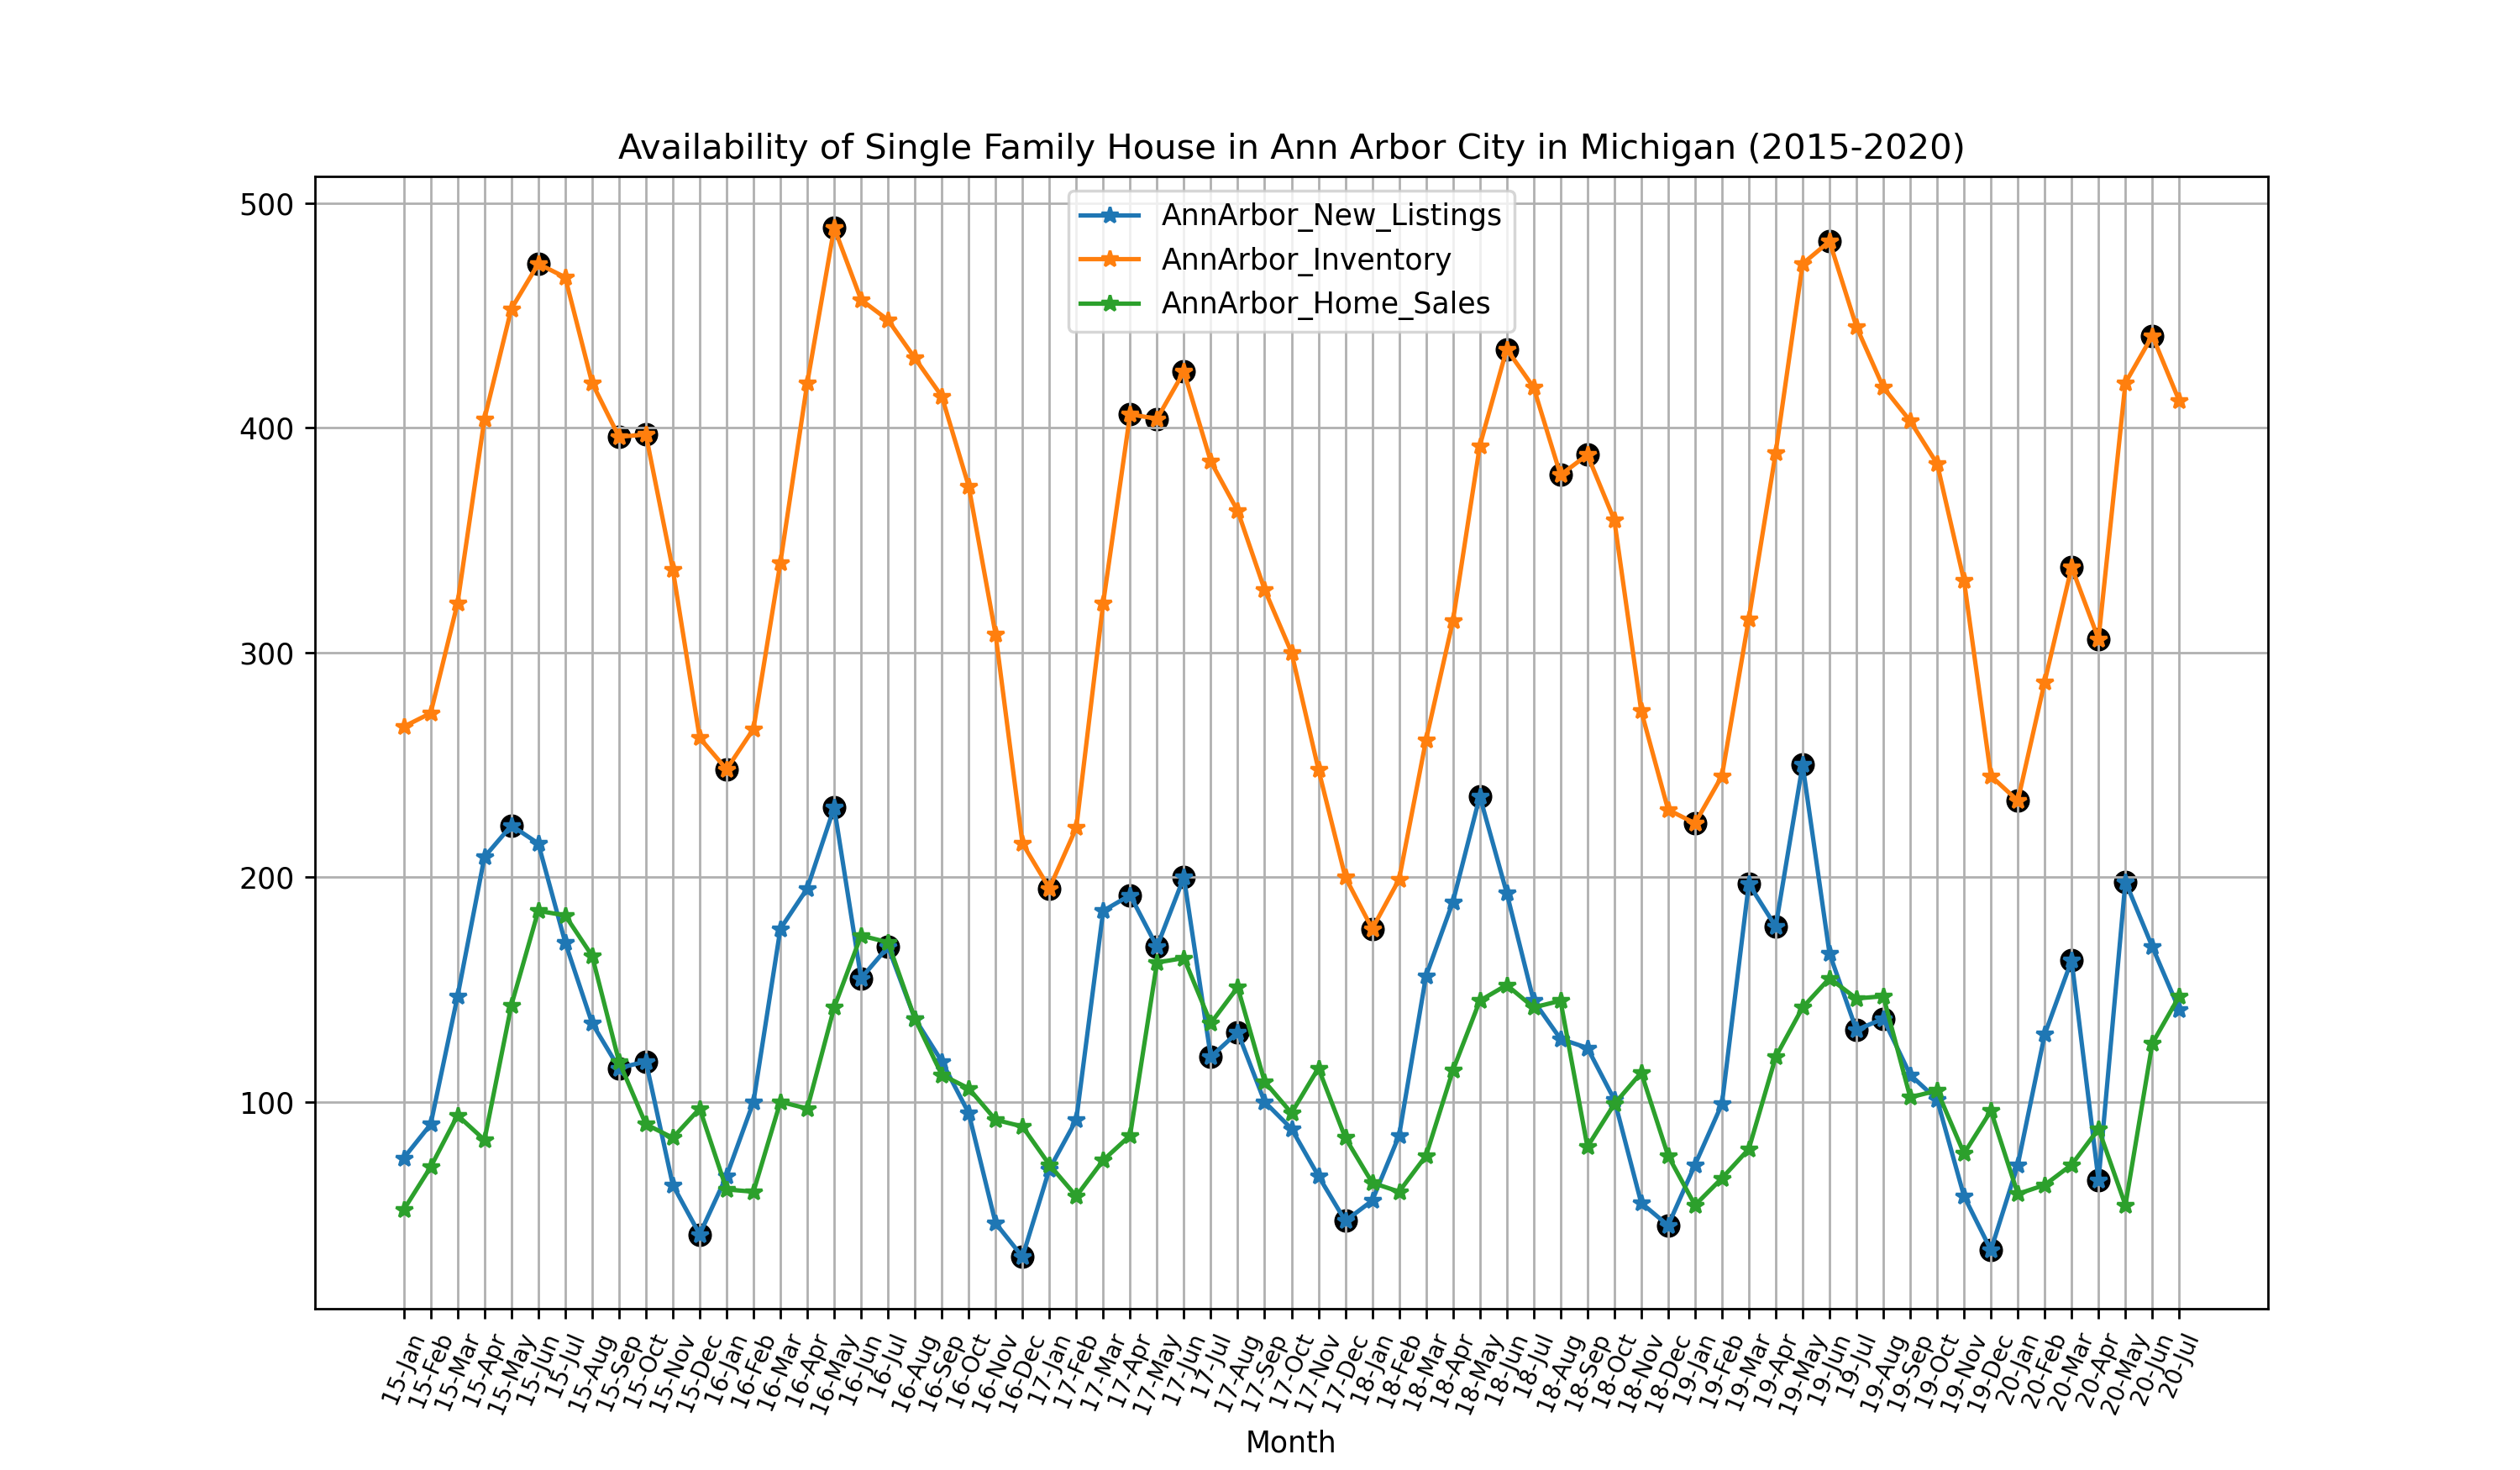

Months with Max Inventory Level in Each Year in Ann Arbor City in Michigan:  ['15-Jun' '15-Oct' '16-May' '17-Apr' '17-Jun' '18-Jun' '18-Sep' '19-Jun'
 '20-Mar' '20-Jun']
Months with Min Inventory Level in Each Year in Ann Arbor City in Michigan:  ['15-Sep' '16-Jan' '17-Jan' '17-May' '18-Jan' '18-Aug' '19-Jan' '20-Jan'
 '20-Apr']
Months with Max New Listings Number in Each Year in Ann Arbor City in Michigan:  ['15-May' '15-Oct' '16-May' '16-Jul' '17-Apr' '17-Jun' '17-Aug' '18-May'
 '19-Mar' '19-May' '19-Aug' '20-Mar' '20-May']
Months with Min New Listings Number in Each Year in Ann Arbor City in Michigan:  ['15-Sep' '15-Dec' '16-Jun' '16-Dec' '17-May' '17-Jul' '17-Dec' '18-Dec'
 '19-Apr' '19-Jul' '19-Dec' '20-Apr']


In [6]:
AnnArbor = df[['Month','AnnArbor_New_Listings','AnnArbor_Inventory','AnnArbor_Home_Sales']]
AnnArbor = AnnArbor.set_index (AnnArbor['Month'])
index = AnnArbor.index.tolist()


from scipy.signal import argrelextrema


Y=np.array(AnnArbor['AnnArbor_Inventory'])
maxInd = argrelextrema(Y, np.greater)
minInd = argrelextrema(Y, np.less)

Z=np.array(AnnArbor['AnnArbor_New_Listings'])
maxInd_listings = argrelextrema(Z, np.greater)
minInd_listings = argrelextrema(Z, np.less)

Fig1 = AnnArbor.plot.line(figsize=(12,7), title='Availability of Single Family House in Ann Arbor City in Michigan (2015-2020)', marker='*', grid=True)
plt.scatter(x= maxInd, y= Y[maxInd], c='black', s=50, marker='o')
plt.scatter(x=minInd, y=Y[minInd], c='black', s=50, marker='o')
plt.scatter(x= maxInd_listings, y= Z[maxInd_listings], c='black', s=50, marker='o')
plt.scatter(x= minInd_listings, y= Z[minInd_listings], c='black', s=50, marker='o')
plt.xticks(list(range(len(index))), index, fontsize=8, rotation=67)


plt.show()


X=np.array(AnnArbor['Month'])
max_loc = X[maxInd]
min_loc = X[minInd]
print('Months with Max Inventory Level in Each Year in Ann Arbor City in Michigan: ', max_loc)
print('Months with Min Inventory Level in Each Year in Ann Arbor City in Michigan: ', min_loc)

max_loc_listings = X[maxInd_listings]
min_loc_listings = X[minInd_listings]
print('Months with Max New Listings Number in Each Year in Ann Arbor City in Michigan: ', max_loc_listings)
print('Months with Min New Listings Number in Each Year in Ann Arbor City in Michigan: ', min_loc_listings)


<IPython.core.display.Javascript object>


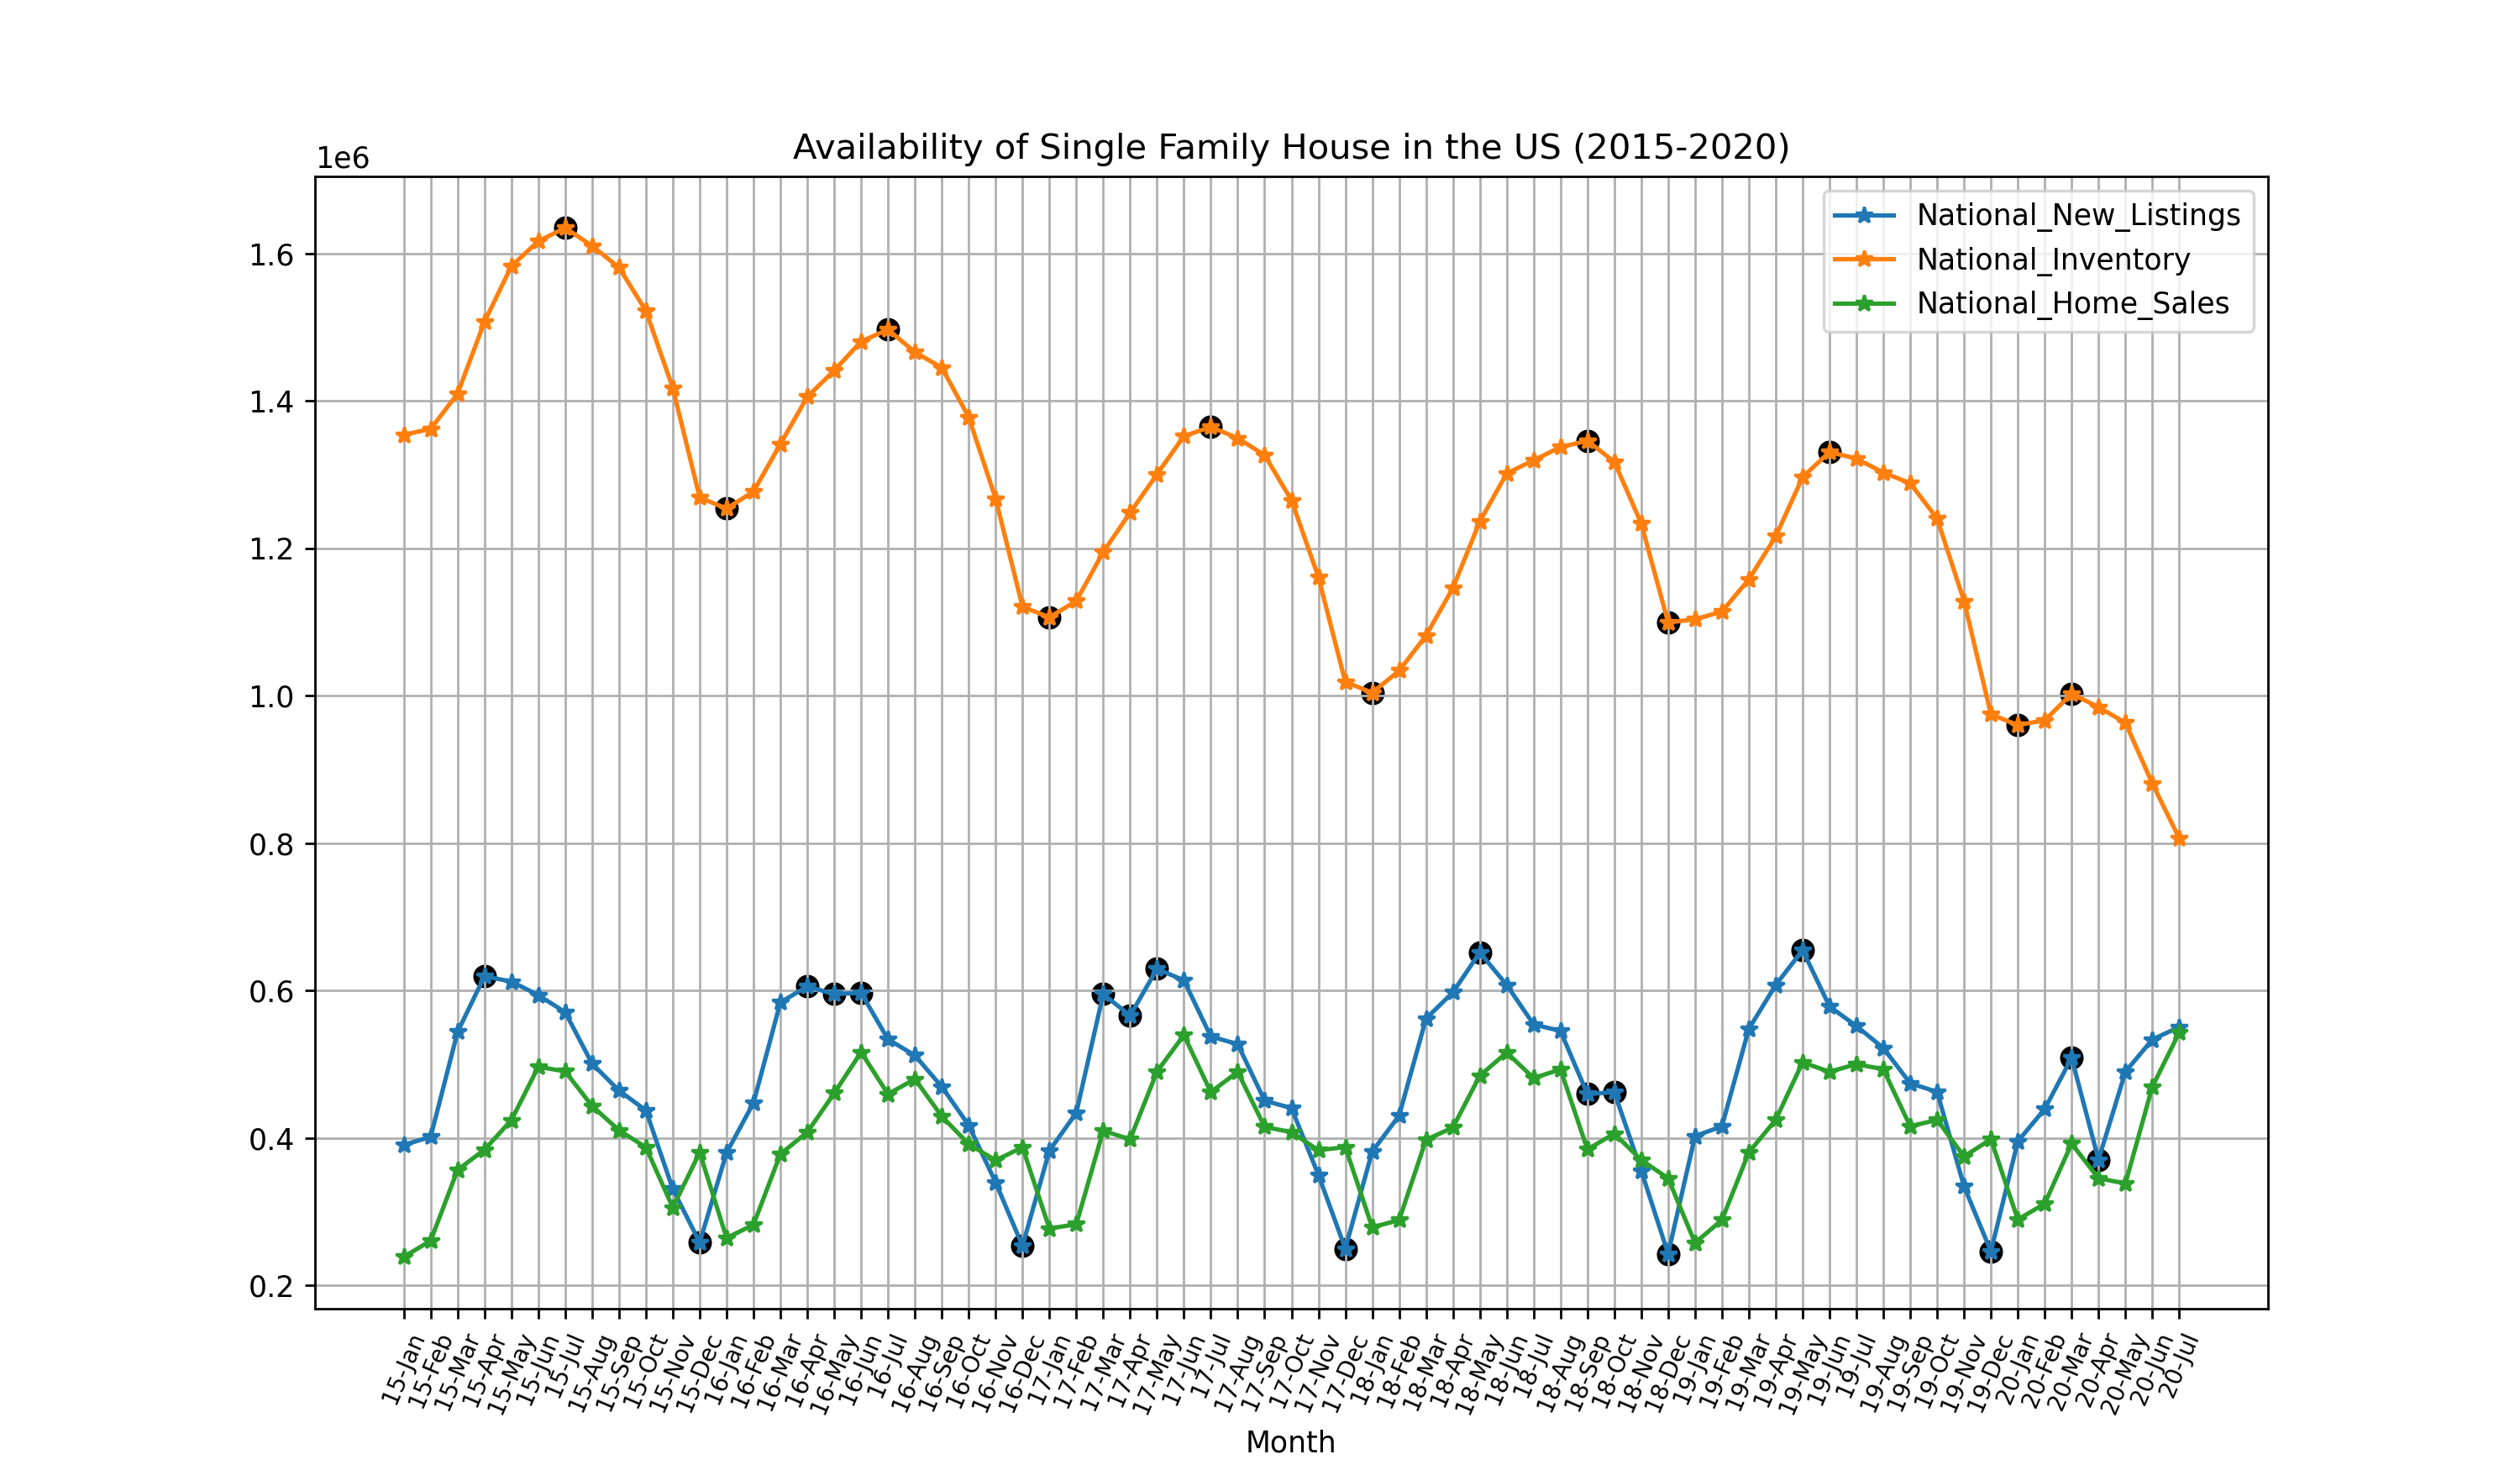

Months with Max Inventory Level in Each Year in the US:  ['15-Jul' '16-Jul' '17-Jul' '18-Sep' '19-Jun' '20-Mar']
Months with Min Inventory Level in Each Year in the US:  ['16-Jan' '17-Jan' '18-Jan' '18-Dec' '20-Jan']
Months with Max New Listings Number in Each Year in the US:  ['15-Apr' '16-Apr' '16-Jun' '17-Mar' '17-May' '18-May' '18-Oct' '19-May'
 '20-Mar']
Months with Min New Listings Number in Each Year in the US:  ['15-Dec' '16-May' '16-Dec' '17-Apr' '17-Dec' '18-Sep' '18-Dec' '19-Dec'
 '20-Apr']


In [7]:
national = df[['Month','National_New_Listings','National_Inventory','National_Home_Sales']]
national = national.set_index (national['Month'])
index = national.index.tolist()

from scipy.signal import argrelextrema

Y=np.array(national['National_Inventory'])
maxInd = argrelextrema(Y, np.greater)
minInd = argrelextrema(Y, np.less)

Z=np.array(national['National_New_Listings'])
maxInd_listings = argrelextrema(Z, np.greater)
minInd_listings = argrelextrema(Z, np.less)

Fig1 = national.plot.line(figsize=(12,7), title='Availability of Single Family House in the US (2015-2020)', marker='*', grid=True)
plt.scatter(x= maxInd, y= Y[maxInd], c='black', s=50, marker='o')
plt.scatter(x= minInd, y= Y[minInd], c='black', s=50, marker='o')
plt.scatter(x= maxInd_listings, y= Z[maxInd_listings], c='black', s=50, marker='o')
plt.scatter(x= minInd_listings, y= Z[minInd_listings], c='black', s=50, marker='o')
plt.xticks(list(range(len(index))), index, fontsize=8, rotation=67)


plt.show()


X=np.array(national['Month'])
max_loc = X[maxInd]
min_loc = X[minInd]
print('Months with Max Inventory Level in Each Year in the US: ', max_loc)
print('Months with Min Inventory Level in Each Year in the US: ', min_loc)

max_loc_listings = X[maxInd_listings]
min_loc_listings = X[minInd_listings]
print('Months with Max New Listings Number in Each Year in the US: ', max_loc_listings)
print('Months with Min New Listings Number in Each Year in the US: ', min_loc_listings)

<IPython.core.display.Javascript object>


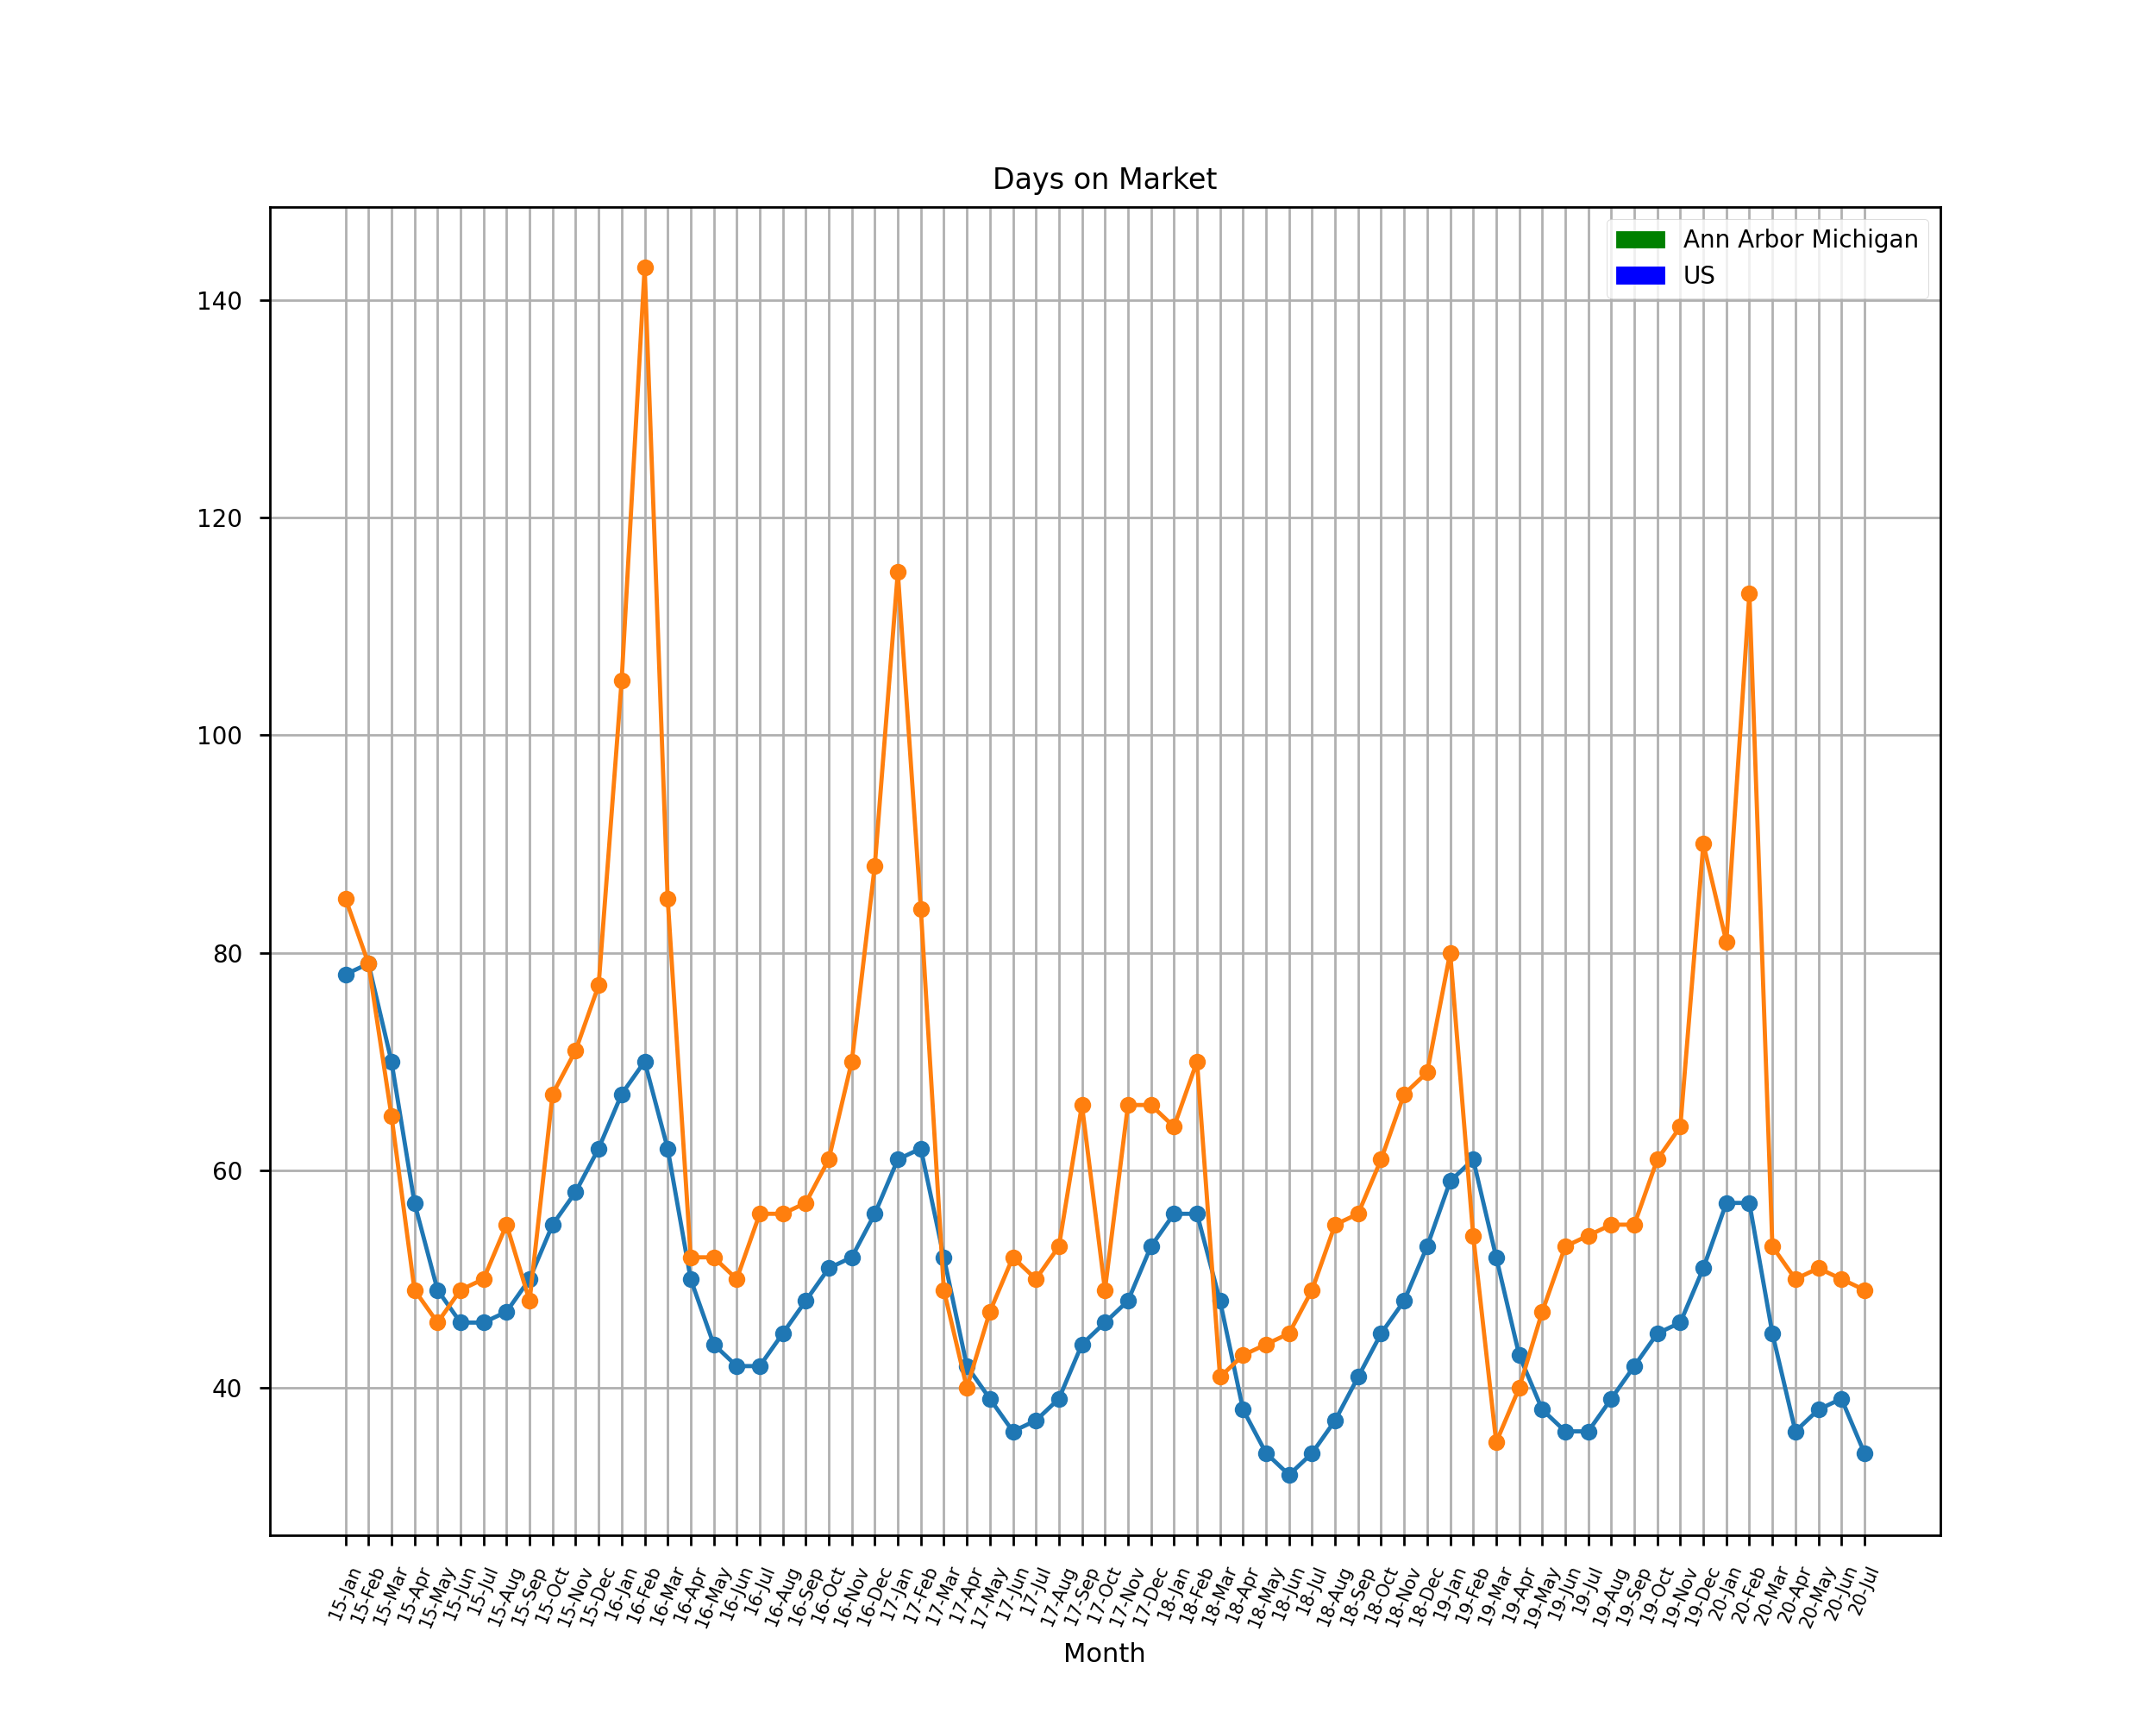

In [8]:
plt.style.use ('seaborn-paper')

days = df[['Month','National_Days_on_Market','AnnArbor_Days_on_Market'] ]
days = days.set_index (days['Month'])
index = days.index.tolist()

f4 = days.plot.line (figsize=(10,8), grid=True, title='Days on Market', marker='o')

plt.xticks(list(range(len(index))), index, fontsize=6, rotation=67)


import matplotlib.patches as mpatches
green_patch = mpatches.Patch(color='green', label='Ann Arbor Michigan')
blue_patch = mpatches.Patch(color='blue', label='US')
plt.legend(handles=[green_patch, blue_patch])

plt.show()

<IPython.core.display.Javascript object>


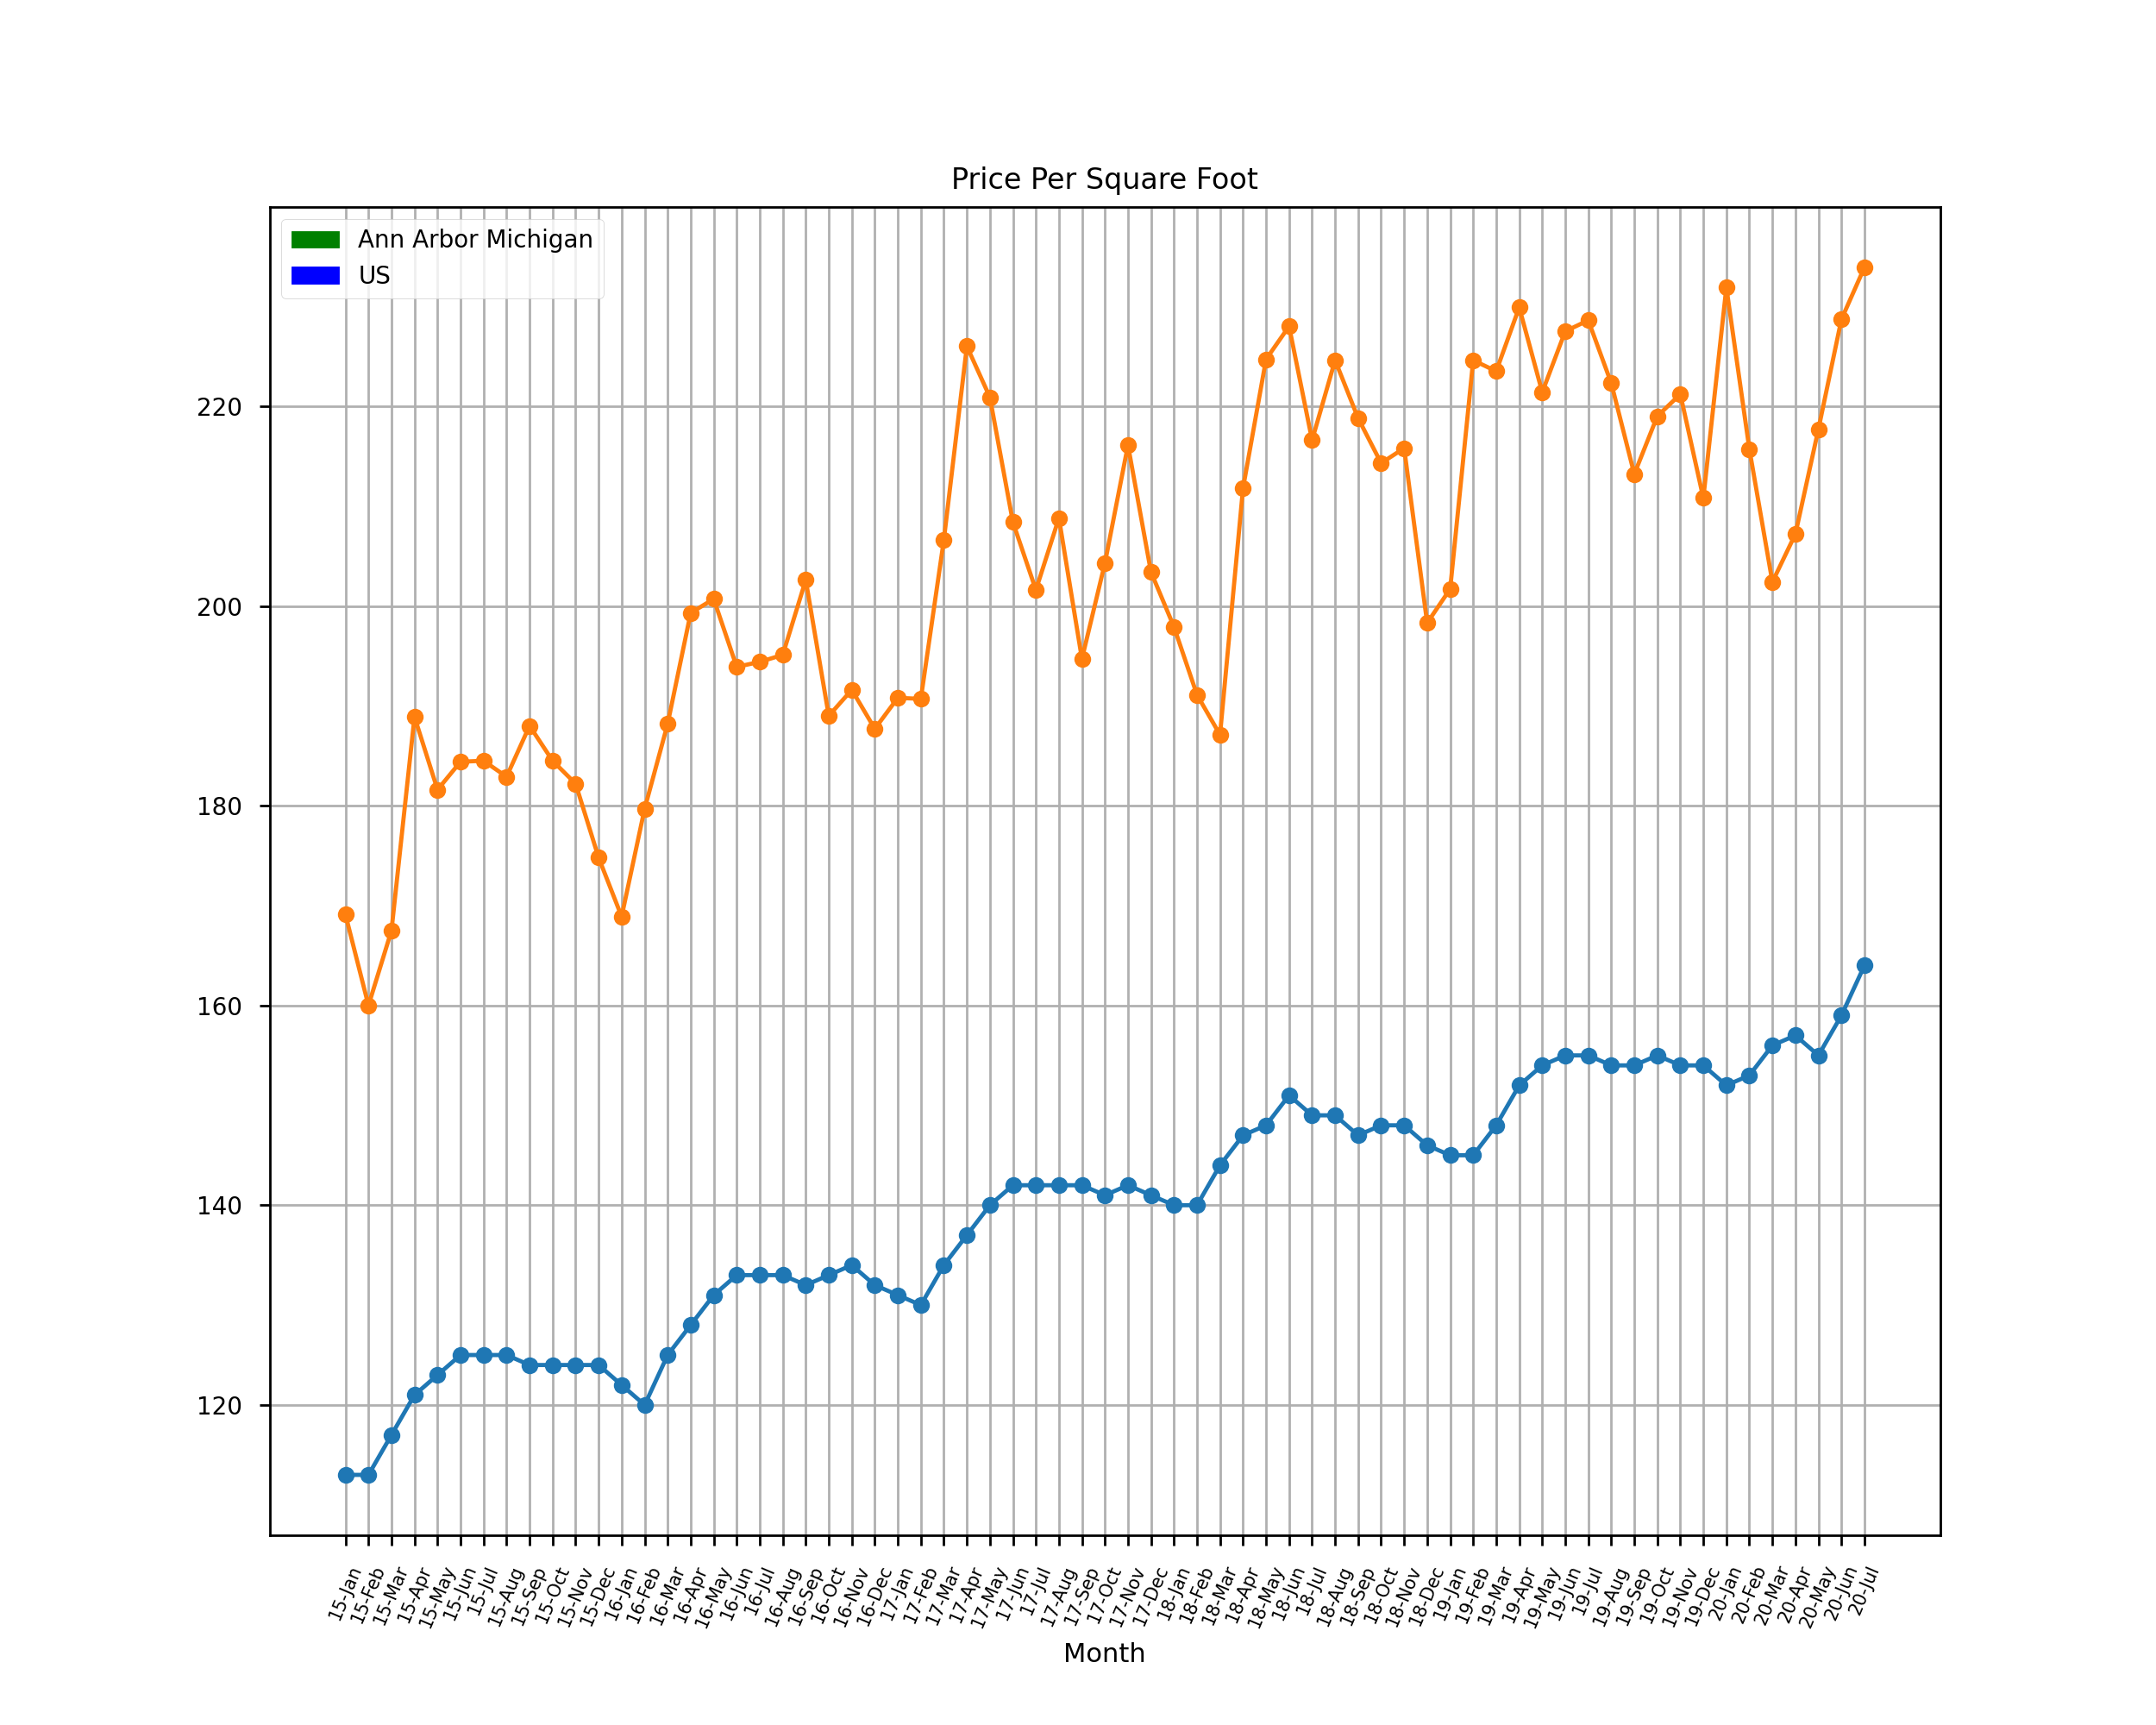

In [9]:
price = df[['Month','National_Price_Per_SquareFoot', 'AnnArbor_Price_Per_SquareFoot']]
#price.plot.scatter('National_Price_Per_SquareFoot', 'AnnArbor_Price_Per_SquareFoot')

price = price.set_index(price['Month'])
index = price.index.tolist()
f4=price.plot.line (figsize=(10,8), grid=True, title='Price Per Square Foot', marker='o')

plt.xticks(list(range(len(index))), index, fontsize=6, rotation=67)


green_patch = mpatches.Patch (color='green', label='Ann Arbor Michigan')
red_patch = mpatches.Patch (color= 'blue', label= 'US')
plt.legend (handles=[green_patch, red_patch])


plt.show()